# Neste projeto vamos analisar dados de apostas online, vamos buscar fazer uma analisar:
* Análise Demográfica por País e por Gênero;
* Análise de Frequência e Distribuição de Tipos de Apostas;
* Relação entre Idade e Valor Médio das Apostas;
* Distribuição das Variáveis Numéricas;
* Análise de Correlação entre Variáveis;
* Identificar Outliers;
* Distribuição de Valores por Intervalos de Tempo;
* Agrupamento e Análise de Subconjuntos;
* Análise da Frequência de Apostas por Usuário;
* Comparação de Apostas Vencedoras e Perdedores;
* Identificar Colunas Altamente Correlacionadas;
* Distribuição das Margens de Lucro;
* Análise de Apostas por Esporte ou Categoria;
* Impacto da Probabilidade no Resultado

* Primeiramente vamos preepar o dataset para as análises:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("mobile_sports_betting.xlsx")

In [3]:
display(df, pd.set_option("display.max_columns",None))

,user_id,age,gender,country,device_os,time_spent (min),session_count,bet_type,favorite_sport,bet_amount,outcome,win_amount,app_version,internet_connection,time_of_day,is_weekend,deposit_amount,withdrawal_amount,user_tier,daily_active_time (min),average_bet_amount,total_bets_placed,days_since_registration,platform_feedback,promo_code_used
0,1,23,M,Canada,iOS,290,18,Pré-jogo,Futebol,241.66,Perdeu,536.54,1.0,5G,Manhã,False,546.55,576.56,VIP,468,335.26,18,125,Neutro,False
1,2,64,M,Germany,Android,192,15,Pré-jogo,Futebol,429.66,Perdeu,0.00,2.0,5G,Tarde,False,240.02,599.65,Iniciante,13,124.66,32,177,Satisfeito,False
2,3,37,F,USA,Android,20,7,Esportes ao vivo,Corrida de cavalos,436.48,Ganhou,673.63,2.1,Wi-Fi,Manhã,False,293.37,715.28,Iniciante,127,169.49,37,232,Satisfeito,False
3,4,22,M,USA,iOS,73,1,Pré-jogo,Tênis,195.14,Perdeu,733.44,1.1,5G,Manhã,False,131.91,403.32,Iniciante,425,189.02,3,326,Satisfeito,False
4,5,50,M,Brazil,iOS,57,9,Pré-jogo,Tênis,24.62,Ganhou,931.78,2.0,Wi-Fi,Manhã,False,457.01,698.30,Regular,282,203.70,4,172,Neutro,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1296,19,F,India,Android,36,9,Esportes virtuais,Boxe,430.63,Perdeu,0.00,2.0,5G,Noite,False,55.89,254.72,Regular,97,154.68,30,309,Insatisfeito,False
1296,1297,33,M,Canada,iOS,65,15,Pré-jogo,Basquete,170.89,Perdeu,218.71,2.1,5G,Manhã,True,802.21,27.12,Iniciante,38,190.09,18,34,Insatisfeito,True
1297,1298,42,F,India,iOS,177,14,Esportes ao vivo,Boxe,191.75,Ganhou,0.00,1.1,4G,Manhã,False,684.60,772.20,Regular,104,96.10,14,261,Satisfeito,False
1298,1299,62,F,UK,Android,298,11,Pré-jogo,Corrida de cavalos,253.90,Perdeu,98.23,2.1,5G,Manhã,False,504.91,536.61,Iniciante,409,25.14,30,246,Neutro,True


None

In [4]:
# Vamos ver uma análise descritiva das variaveís númericas:
df.describe().round(2)

,user_id,age,time_spent (min),session_count,bet_amount,win_amount,app_version,deposit_amount,withdrawal_amount,daily_active_time (min),average_bet_amount,total_bets_placed,days_since_registration
count,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00
mean,650.50,40.99,154.70,10.08,244.97,243.09,1.55,497.03,504.03,258.87,202.61,25.37,181.39
std,375.42,13.46,85.38,5.46,144.17,317.16,0.50,288.07,291.85,141.51,112.87,13.91,105.50
min,1.00,18.00,5.00,1.00,5.01,0.00,1.00,2.08,0.15,10.00,10.02,1.00,1.00
25%,325.75,29.00,83.00,6.00,118.03,0.00,1.00,253.06,255.91,137.75,100.31,14.00,92.00
50%,650.50,41.00,157.00,10.00,238.06,0.00,1.10,493.52,509.25,266.50,205.76,25.00,178.50
75%,975.25,52.00,228.25,15.00,371.18,489.13,2.10,737.23,767.74,380.00,297.50,37.00,272.00
max,1300.00,64.00,299.00,19.00,499.71,999.32,2.10,999.53,999.32,499.00,399.99,49.00,364.00


In [5]:
# Vamos analisar se há valores nulos:
df.isnull().sum() 

user_id                    0
age                        0
gender                     0
country                    0
device_os                  0
time_spent (min)           0
session_count              0
bet_type                   0
favorite_sport             0
bet_amount                 0
outcome                    0
win_amount                 0
app_version                0
internet_connection        0
time_of_day                0
is_weekend                 0
deposit_amount             0
withdrawal_amount          0
user_tier                  0
daily_active_time (min)    0
average_bet_amount         0
total_bets_placed          0
days_since_registration    0
platform_feedback          0
promo_code_used            0
dtype: int64

* Feito isso, vamos para os nossos desafios:

1. Análise Demográfica por País e Gênero

    * Desafio: Agrupe os dados por país e gênero, e calcule a média de idade, valor médio de aposta, e tempo médio de sessão. 

In [6]:
# Primeiramente vamos ver quais paises estão no nosso DataFrame:
df['country'].unique()

array(['Canada', 'Germany', 'USA', 'Brazil', 'UK', 'India'], dtype=object)

In [7]:
# Vamos criar um novo DataFrame para que vejamos o quanto cada apostador apostou em média e o tempo médio de sessão desse usuário:

# Criando um novo DataFrame com a coluna 'country' e as médias transformadas:
df_media_usuarios = df[['country', 'gender', 'age']].copy()

# Calculando as médias e atribuindo ao novo DataFrame:
df_media_usuarios[['bet_amount', 'daily_active_time (min)']] = (
    df.groupby(['country', 'gender', 'age'])[['bet_amount', 'daily_active_time (min)']]
    .transform('mean')
    .round(2)
)

In [8]:
display(df_media_usuarios)

,country,gender,age,bet_amount,daily_active_time (min)
0,Canada,M,23,292.12,301.00
1,Germany,M,64,223.02,240.50
2,USA,F,37,323.93,220.33
3,USA,M,22,202.49,275.75
4,Brazil,M,50,24.48,257.00
...,...,...,...,...,...
1295,India,F,19,230.12,280.50
1296,Canada,M,33,238.45,248.75
1297,India,F,42,114.67,250.00
1298,UK,F,62,253.90,409.00


* 2. Análise de Frequência e Distribuição de Tipos de Apostas

    * Desafio: Calcule a frequência de cada tipo de aposta (bet_type) e favorite_sport, e crie uma visualização que mostre os tipos de apostas mais populares e os esportes favoritos.

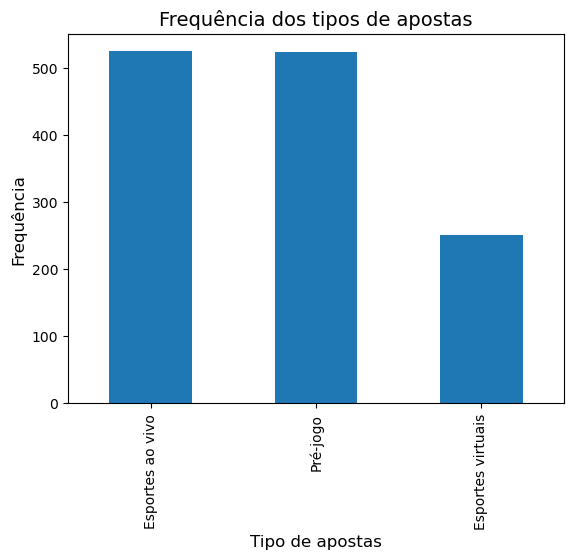

In [9]:
# Elaborando o gráfico de frequência dos tipos de apostas:
df['bet_type'].value_counts().plot(kind='bar')
plt.title('Frequência dos tipos de apostas', fontsize=14)
plt.xlabel('Tipo de apostas', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

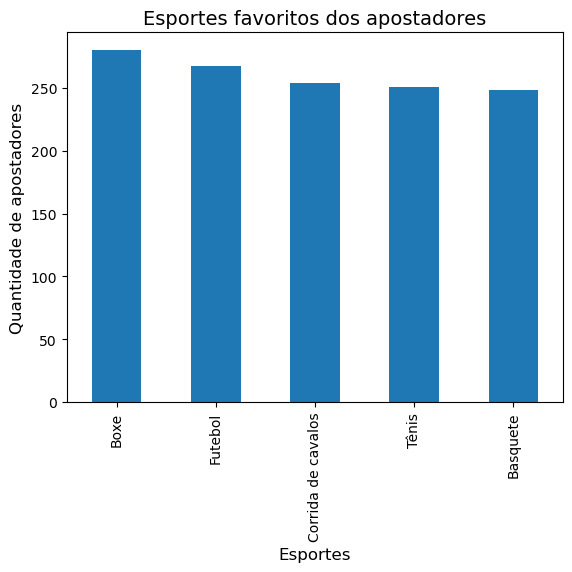

In [10]:
# Elaborando o gráfico de sports favoritos:
df['favorite_sport'].value_counts().plot(kind='bar')
plt.title('Esportes favoritos dos apostadores', fontsize=14)
plt.xlabel('Esportes', fontsize=12)
plt.ylabel('Quantidade de apostadores', fontsize=12)
plt.show()

3. Relação entre Idade e Valor Médio das Apostas

    * Desafio: Crie um gráfico de dispersão (scatter plot) da idade vs. valor médio das apostas (average_bet_amount). Analise se há uma correlação entre idade e valores apostados.

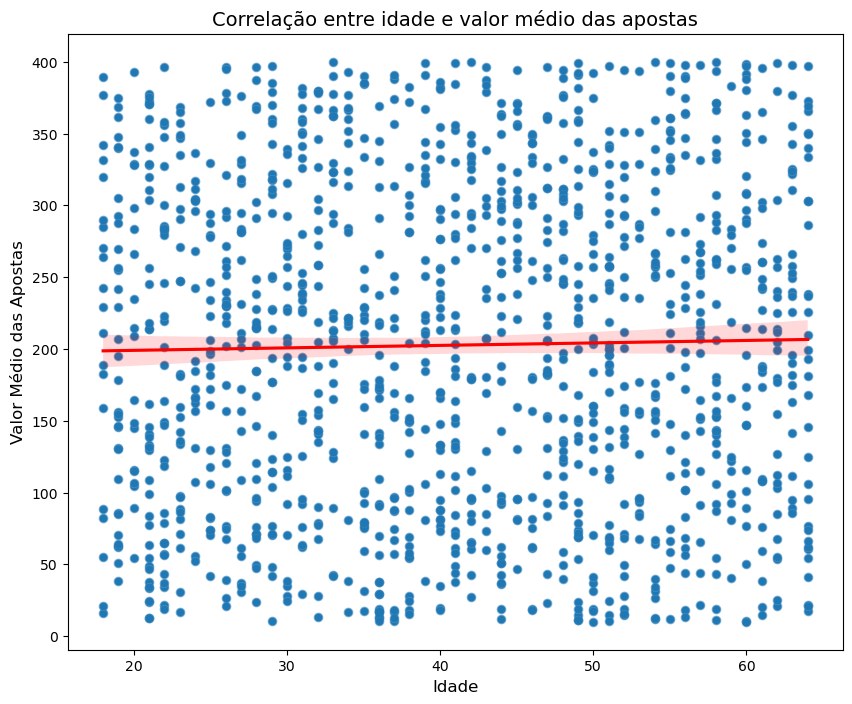

In [ ]:
# Vamos ultilizar o seaborn para criar o nosso gráfico de dispersão:
plt.figure(figsize=(10,8))
sns.scatterplot(x='age', y='average_bet_amount', data=df)
sns.regplot(x='age', y='average_bet_amount', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Correlação entre idade e valor médio das apostas',fontsize=14)
plt.xlabel('Idade',fontsize=12)
plt.ylabel('Valor Médio das Apostas', fontsize=12)
plt.show()

# Ultilizamos a função regplot() para adicionar uma linha de tendência.

* Análisando o gráfico, podemos perceber que não há uma correlação tão significativa entre a idade e o valor médio das apostas, linha de tendência é quase que horizontal.

* Portanto, vamos fazer a análise de correlação entre essas variaveís(idade / valor médio apostado) por país.

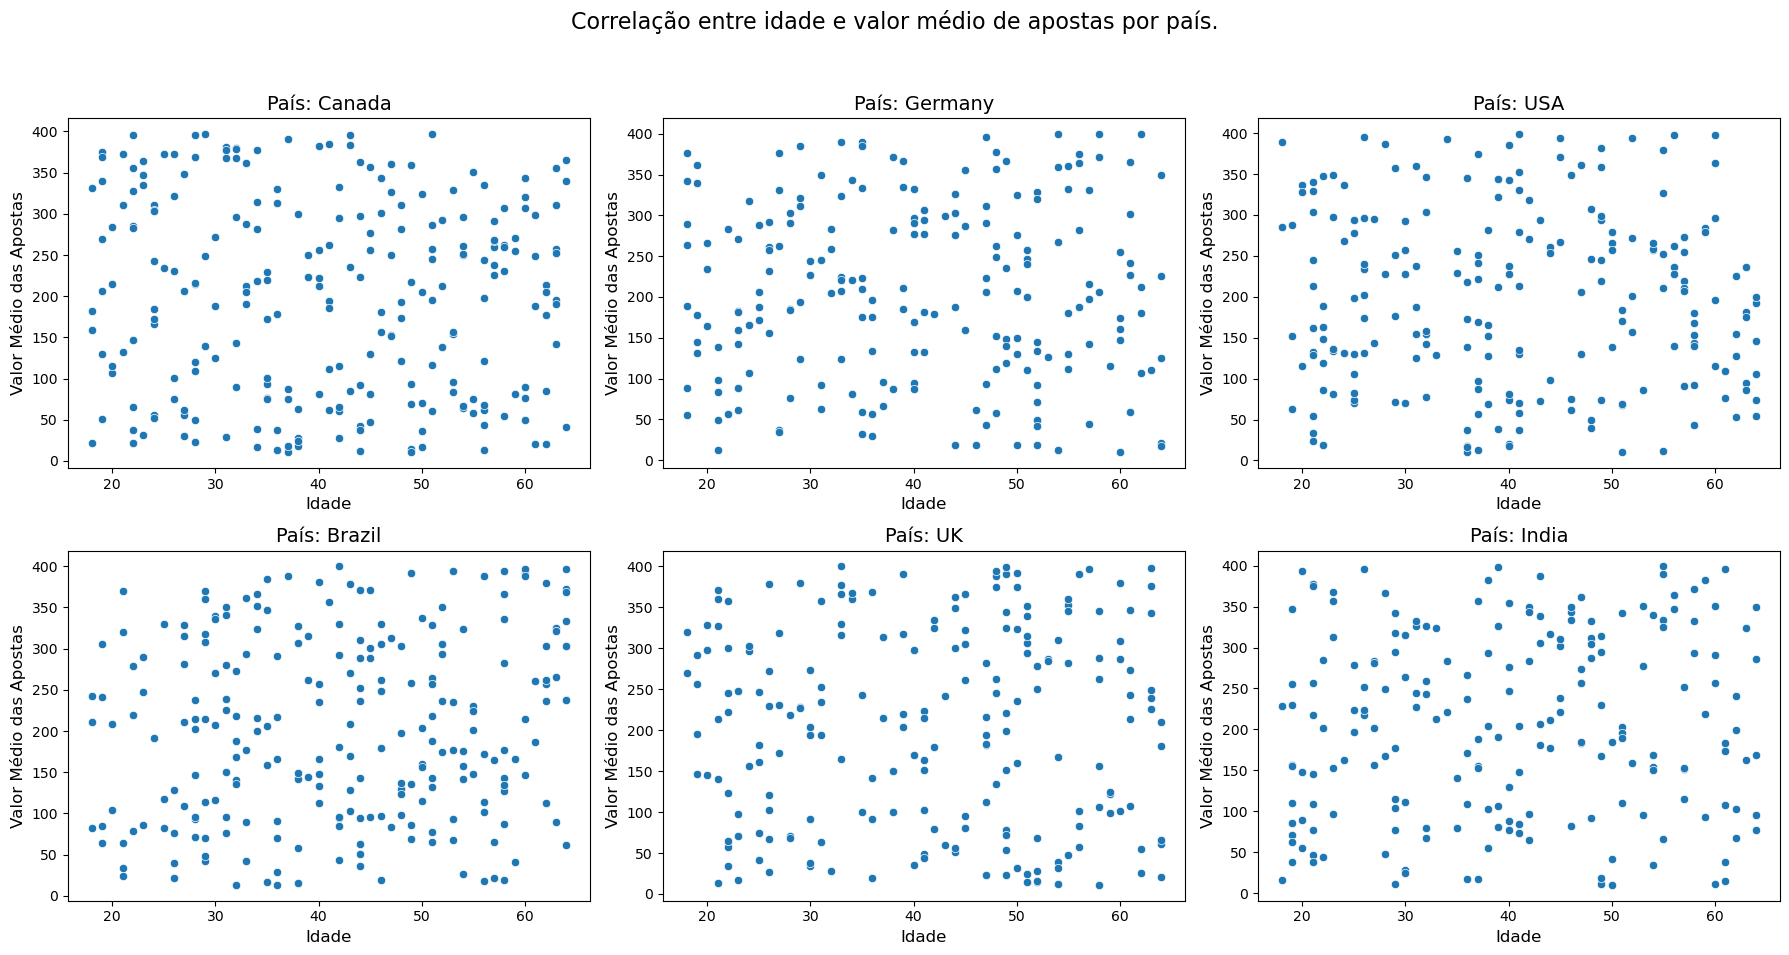

In [12]:
# Primeiramente criamos uma lista com os países do nosso DataFrame para que assim possamos iterar sobre eles:
paises = ['Canada', 'Germany', 'USA', 'Brazil', 'UK', 'India']

# Criamos uma grade de subplots com 2 linhas e 3 colunas:
fig, axes = plt.subplots(2, 3, figsize=(18,10))
fig.suptitle('Correlação entre idade e valor médio de apostas por país.',fontsize=16)

# Iterando pelos países e pelos subplots:
for i, pais in enumerate(paises):
    # Seleciona no DataFrame apenas os dados do país atual:
    df_pais = df[df['country'] == pais]

    # Vamos definir a posição do subplot:
    ax = axes[i // 3, i % 3]

    # Vamos criar o gráfico de dispersão para o país atual:
    sns.scatterplot(x='age', y='average_bet_amount', data=df_pais, ax=ax)
    ax.set_title(f'País: {pais}', fontsize=14)
    ax.set_xlabel('Idade', fontsize=12)
    ax.set_ylabel('Valor Médio das Apostas', fontsize=12)


# Vamos ajustar o layout para evitar sobre posição:
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

4. Distribuição de Depósitos e Saques por Categoria de Usuário

    * Desafio: Para cada nível de user_tier (ex.: Iniciante, Regular, VIP), analise a distribuição de depósitos e saques. 

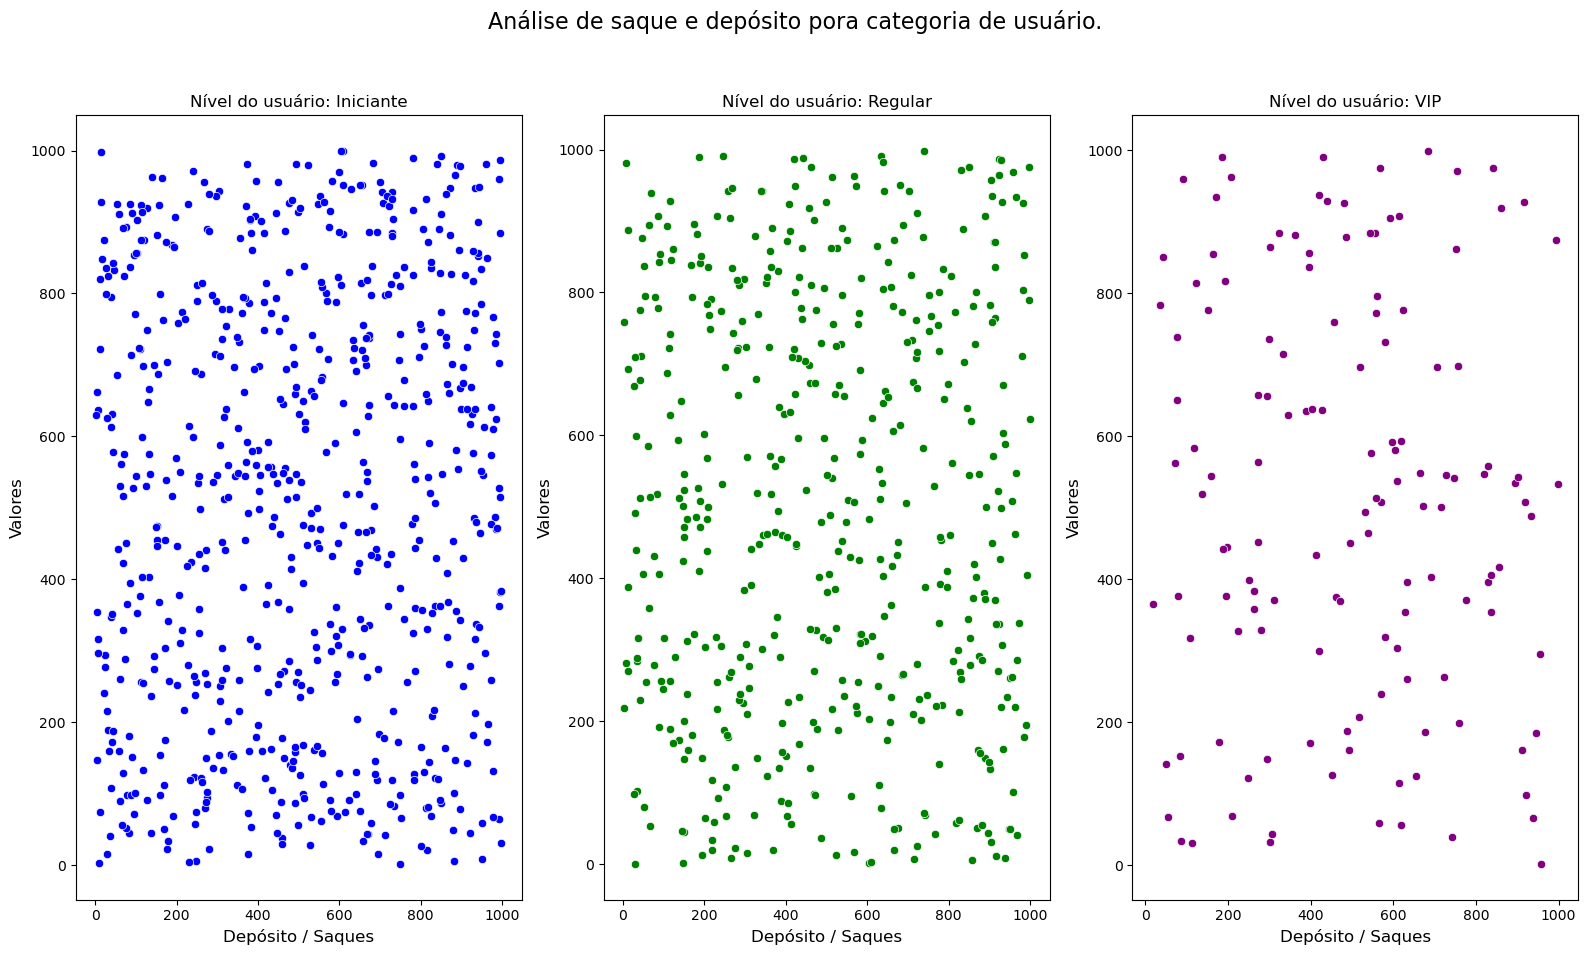

In [17]:
nivel_usuario = ['Iniciante', 'Regular', 'VIP']

fig, axes = plt.subplots(1, 3, figsize=(16,10))
fig.suptitle('Análise de saque e depósito pora categoria de usuário.',fontsize=16)

for i, usuario in enumerate(nivel_usuario):
    df_nivel_usuario = df[df['user_tier'] == usuario]

    ax = axes[i]

    cores = ['blue', 'green', 'purple']
    sns.scatterplot(x='deposit_amount', y='withdrawal_amount', data=df_nivel_usuario, ax=ax, color=cores[i])
    ax.set_title(f'Nível do usuário: {usuario}')
    ax.set_xlabel('Depósito / Saques',fontsize=12)
    ax.set_ylabel('Valores', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()